In [209]:
import pandas, seaborn, scipy, numpy, matplotlib, sklearn, collections, itertools, math, functools, sys

%matplotlib inline
from matplotlib import pyplot
matplotlib.rc("savefig", dpi=800)
#matplotlib.rc("savefig", dpi=72)

from sklearn import preprocessing

# Constants
library_sizes = {
    'WGS': 3002000000,
    'WES': 50160183,
}
mhc_binding_threshold_affinity = 500

def bootstrap(values, statistic=numpy.mean, samples=5000):
    values = pandas.Series(values).dropna()
    if len(values) <= 1:
        return (numpy.nan, numpy.nan)
    values = [statistic(sklearn.utils.resample(values)) for i in range(samples)]
    return (numpy.percentile(values, 5), numpy.percentile(values, 95))

def round_to_n(x, n):
    return round(x, -int(math.floor(math.log10(x))) + (n - 1)) 

def mean_with_errorbars(values, decimals=0):
    pattern = "%%0.%df" % decimals
    bars = bootstrap(values)
    if numpy.nan in bars:
        return pattern % numpy.mean(values)
    if decimals == 0:
        bars = (round_to_n(bars[0], 2), round_to_n(bars[1], 2)) 
    return (pattern + " (" + pattern + " - " + pattern + ")") % ((numpy.mean(values),) + bars)

pandas.set_option('display.max_columns', 500)


def print_full(x):
    pandas.set_option('display.max_rows', len(x))
    print(x)
    pandas.reset_option('display.max_rows')

In [170]:
df = pandas.read_csv("../data/sources.extended.csv", index_col="source_id")
df = df.ix[~pandas.isnull(df.mutations)]
#df = df.ix[df.paired]
df

,Unnamed: 0,index,donor,cohort,library,treated,timepoint,metastasis,tissue_type,interval_days,assay,paired,timepoint_paired,protein changing,peptides,expressed peptides,mutations,mutations_per_mb,indel,interesting mutations,group,treatment,fraction_peptides_expressed,project_code,study_specimen_involved_in,submitted_specimen_id,icgc_donor_id,submitted_donor_id,specimen_type,specimen_type_other,specimen_interval,specimen_donor_treatment_type,specimen_donor_treatment_type_other,specimen_processing,specimen_storage,tumour_confirmed,tumour_histological_type,tumour_grading_system,tumour_grade,tumour_stage_system,tumour_stage,percentage_cellularity,level_of_cellularity
source_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AOCS-001-1/SP101515,0,SP101515,AOCS-001,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,50,128,71,5937,1.977682,1,19.302678,AOCS solid,treatment naive,0.554688,OV-AU,PCAWG,AOCS-001-1,DO46325,AOCS-001,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,3,FIGO,III,73,61-80%
AOCS-002-1/SP101517,1,SP101517,AOCS-002,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,11,32,NaN,1532,0.510326,0,17.297650,AOCS solid,treatment naive,NaN,OV-AU,PCAWG,AOCS-002-1,DO46326,AOCS-002,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,2,FIGO,III,85,>81%
AOCS-004-1/SP101519,2,SP101519,AOCS-004,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,57,58,20,6786,2.260493,1,16.931919,AOCS solid,treatment naive,0.344828,OV-AU,PCAWG,AOCS-004-1,DO46327,AOCS-004,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,3,FIGO,III,77,61-80%
AOCS-005-1/SP101521,3,SP101521,AOCS-005,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,39,61,39,5703,1.899734,2,15.640891,AOCS solid,treatment naive,0.639344,OV-AU,PCAWG,AOCS-005-1,DO46328,AOCS-005,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,3,FIGO,III,90,>81%
AOCS-034-13/SP101524,4,SP101524,AOCS-034,AOCS,WGS,True,recurrence,False,ascites,1597,WGS,True,True,123,269,138,13626,4.538974,5,17.906943,AOCS ascites,chemo treated,0.513011,OV-AU,NaN,AOCS-034-13,DO46329,AOCS-034,Recurrent tumour - other,recurrent ascitic fluid,1597,other therapy,Surgery and Chemotherapy,fresh,"frozen, vapor phase",no,8140/3,NaN,NaN,NaN,NaN,99,>81%
AOCS-034-1/SP101523,5,SP101523,AOCS-034,AOCS,WGS,False,primary,False,solid,0,WGS,True,True,74,171,68,6913,2.302798,4,18.429047,AOCS solid,treatment naive,0.397661,OV-AU,PCAWG,AOCS-034-1,DO46329,AOCS-034,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8140/3,Silverberg,3,FIGO,III,84,>81%
AOCS-055-1/SP101526,6,SP101526,AOCS-055,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,116,178,92,15112,5.033977,0,11.348597,AOCS solid,treatment naive,0.516854,OV-AU,PCAWG,AOCS-055-1,DO46330,AOCS-055,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,3,FIGO,III,82,>81%
AOCS-056-1/SP101528,7,SP101528,AOCS-056,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,56,300,16,7102,2.365756,1,20.909603,AOCS solid,treatment naive,0.053333,OV-AU,PCAWG,AOCS-056-1,DO46331,AOCS-056,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,NaN,2,FIGO,III,94,>81%
AOCS-057-1/SP101530,8,SP101530,AOCS-057,AOCS,WGS,False,primary,False,solid,0,WGS,False,False,45,156,NaN,6201,2.065623,5,19.593614,AOCS solid,treatment naive,NaN,OV-AU,PCAWG,AOCS-057-1,DO46332,AOCS-057,Primary tumour - solid tissue,NaN,0,no treatment,NaN,fresh,"frozen, vapor phase",no,8441/3,Silverberg,3,FIGO,III,68,61-80%


In [359]:
#seaborn.lmplot(data=df, x="percentage_cellularity", y="mutations", hue="tissue_type")

In [171]:
predicted = ["mutations", "peptides", "expressed peptides"]

# donor is handled specially
predictors = [
    "treated",
#    "timepoint",
#    "metastasis",
#    "specimen_interval",
    "tissue_type",
#    "tumour_grade",
#    "tumour_stage",
    "percentage_cellularity"
]

In [402]:
def make_data(y_column):
    stan_df = df[[y_column, "donor"] + predictors].copy()
    stan_df.columns = ["y"] + list(stan_df.columns[1:])
    stan_df["y"] = numpy.log(stan_df["y"])
    original_donors = stan_df.donor
    stan_df["low_cellularity"] = stan_df.percentage_cellularity < stan_df.percentage_cellularity.quantile(.25)
    del stan_df["percentage_cellularity"]
    stan_df["ascites"] = stan_df["tissue_type"] == "ascites"
    del stan_df["tissue_type"]
    stan_df["num_sources_for_donor"] = pandas.Series(
        [(original_donors == donor).sum() for donor in original_donors],
        index=original_donors.index)

    stan_df = stan_df.dropna()
    stan_df["donor"] = stan_df.donor.astype('category').values.codes
    stan_df["solid and treated"] = (~stan_df.ascites) & (stan_df.treated)
    return stan_df

data_by_predicted = collections.OrderedDict()
for col in predicted:
    data_by_predicted[col] = make_data(col)
    print(col, data_by_predicted[col].shape)
data_by_predicted["mutations"]  

('mutations', (115, 7))
('peptides', (115, 7))
('expressed peptides', (98, 7))


,y,donor,treated,low_cellularity,ascites,num_sources_for_donor,solid and treated
source_id,,,,,,,
AOCS-001-1/SP101515,8.688959,0,False,True,False,1,False
AOCS-002-1/SP101517,7.334329,1,False,False,False,1,False
AOCS-004-1/SP101519,8.822617,2,False,True,False,1,False
AOCS-005-1/SP101521,8.648748,3,False,False,False,1,False
AOCS-034-13/SP101524,9.519735,4,True,False,True,2,False
AOCS-034-1/SP101523,8.841159,4,False,False,False,2,False
AOCS-055-1/SP101526,9.623244,5,False,False,False,1,False
AOCS-056-1/SP101528,8.868132,6,False,False,False,1,False
AOCS-057-1/SP101530,8.732466,7,False,True,False,1,False


In [403]:
import pystan, time
FIT_CACHE={}
def run_stan(model_code, *args, **kwargs):
    kwargs = dict(kwargs)
    kwargs['model_code'] = model_code
    if 'n_jobs' not in kwargs:
        kwargs['n_jobs'] = -1
    if model_code in FIT_CACHE:
        print("Reusing fit.")
        kwargs['fit'] = FIT_CACHE[model_code]
    else:
        print("NOT reusing fit.")
    start = time.time()
    FIT_CACHE[model_code] = pystan.stan(*args, **kwargs)
    print("Ran in %0.3f sec." % (time.time() - start))
    return FIT_CACHE[model_code]



In [412]:
# stan model
model1 = """
data {
    // Data sizes
    int<lower=0> num_sources;
    int<lower=0> num_predictors;
    int<lower=0> num_donors;

    // Data
    vector[num_predictors] predictors[num_sources];
    int<lower=0> donors[num_sources];
    real y[num_sources];  // predicted variable
    int<lower=1> num_sources_for_donor[num_sources];
}
parameters {
    real global_mean;
    real<lower=0> donor_sigma;
    real<lower=0> sample_sigma;
    vector[num_donors] donor_mean;    
    vector[num_predictors] predictor_coefficients;
}
transformed parameters {
    real lp;
    real mu[num_sources];
    
    for (i in 1:num_sources) {
        lp <- dot_product(predictors[i], predictor_coefficients);
        if (num_sources_for_donor[i] > 1) {
            mu[i] <- donor_mean[donors[i]] + lp;
        } else {
            mu[i] <- global_mean + lp;
        }
    }
}
model {
    global_mean ~ normal(0, 20);
    donor_mean ~ normal(global_mean, donor_sigma);
    predictor_coefficients ~ normal(0, 5);
    y ~ normal(mu, sample_sigma);    
}
""".strip()

data = {    

}
def init(data):
    return {
        'global_mean': 0.0,
        'donor_sigma': 1.0,
        'sample_sigma': 1.0,
        'donor_mean': numpy.zeros(data['num_donors']),
        'predictor_coefficients': numpy.random.normal(0, .1, size=(data['num_predictors'],)),
    }

for (i, line) in enumerate(model1.split("\n")):
    print("%3d %s" % (i + 1, line))

def print_dict(d):
    for key in [key for key in d if not isinstance(d[key], numpy.ndarray)]:
        print("%s: %s" % (key, d[key]))
    for key in [key for key in d if isinstance(d[key], numpy.ndarray)]:
        print("%s: %s mean=%s std=%s" % (key,  d[key].shape, d[key].mean(), d[key].std()))

fit_results = {}
for (y_label, raw_data) in data_by_predicted.items():
    print("+" * 40)
    print("RUNNING MODEL FOR: %s" % y_label)
    df_x = raw_data[[x for x in list(raw_data.columns) if x not in ("y", "donor")]].astype(float)
    data = {
        'num_sources': len(raw_data.index),
        'num_predictors': len(df_x.columns),
        'num_donors': raw_data.donor.nunique(),

        'predictors': df_x.values.astype(float),
        'donors': raw_data.donor.values + 1,  # convert to 1-indexed
        'num_sources_for_donor': raw_data.num_sources_for_donor.values,
        'y': raw_data.y.values,
    }
    print("")
    print("*" * 40)
    print("DATA")
    print_dict(data)
    print("")

    print("*" * 40)
    print("INITIAL VALUES")
    print_dict(init(data))
    sys.stdout.flush()
    
    fit_results[y_label] = run_stan(model_code=model1, data=data, init=lambda: init(data), iter=10000, chains=2)
    print("Done with fit.")
print("DONE")


  1 data {
  2     // Data sizes
  3     int<lower=0> num_sources;
  4     int<lower=0> num_predictors;
  5     int<lower=0> num_donors;
  6 
  7     // Data
  8     vector[num_predictors] predictors[num_sources];
  9     int<lower=0> donors[num_sources];
 10     real y[num_sources];  // predicted variable
 11     int<lower=1> num_sources_for_donor[num_sources];
 12 }
 13 parameters {
 14     real global_mean;
 15     real<lower=0> donor_sigma;
 16     real<lower=0> sample_sigma;
 17     vector[num_donors] donor_mean;    
 18     vector[num_predictors] predictor_coefficients;
 19 }
 20 transformed parameters {
 21     real lp;
 22     real mu[num_sources];
 23     
 24     for (i in 1:num_sources) {
 25         lp <- dot_product(predictors[i], predictor_coefficients);
 26         if (num_sources_for_donor[i] > 1) {
 27             mu[i] <- donor_mean[donors[i]] + lp;
 28         } else {
 29             mu[i] <- global_mean + lp;
 30         }
 31     }
 32 }
 33 model {
 34     global

In [413]:
all_fit_coefficients = []
for (y_label, fit) in fit_results.items():
    extracted = fit.extract()
    fit_coefficients = pandas.DataFrame(numpy.exp(extracted['predictor_coefficients']),
                           columns=list(data_by_predicted[y_label].columns)[2:])
    fit_coefficients["y_label"] = y_label
    all_fit_coefficients.append(fit_coefficients)
all_fit_coefficients = pandas.concat(all_fit_coefficients, ignore_index=True)
all_fit_coefficients

,treated,low_cellularity,ascites,num_sources_for_donor,solid and treated,y_label
0,1.337633,1.154373,1.569181,1.105477,2.542011,peptides
1,1.198198,0.976434,1.905495,1.190192,1.385467,peptides
2,2.155087,1.214789,0.968168,1.355307,0.994587,peptides
3,2.388624,0.759413,0.728744,1.330531,0.641583,peptides
4,1.287958,1.009191,1.719363,1.118588,2.079987,peptides
5,1.325486,0.963492,1.123596,1.326392,1.226159,peptides
6,1.843433,0.846904,1.066638,1.299461,0.800689,peptides
7,1.088035,0.898979,1.316874,1.224753,1.758667,peptides
8,2.407182,1.147947,0.650155,1.358574,0.562705,peptides
9,2.001211,1.349118,1.154231,1.305691,0.819505,peptides


In [435]:
melted = pandas.melt(all_fit_coefficients, id_vars=["y_label"])

In [436]:
melted

,y_label,variable,value
0,peptides,treated,1.337633
1,peptides,treated,1.198198
2,peptides,treated,2.155087
3,peptides,treated,2.388624
4,peptides,treated,1.287958
5,peptides,treated,1.325486
6,peptides,treated,1.843433
7,peptides,treated,1.088035
8,peptides,treated,2.407182
9,peptides,treated,2.001211


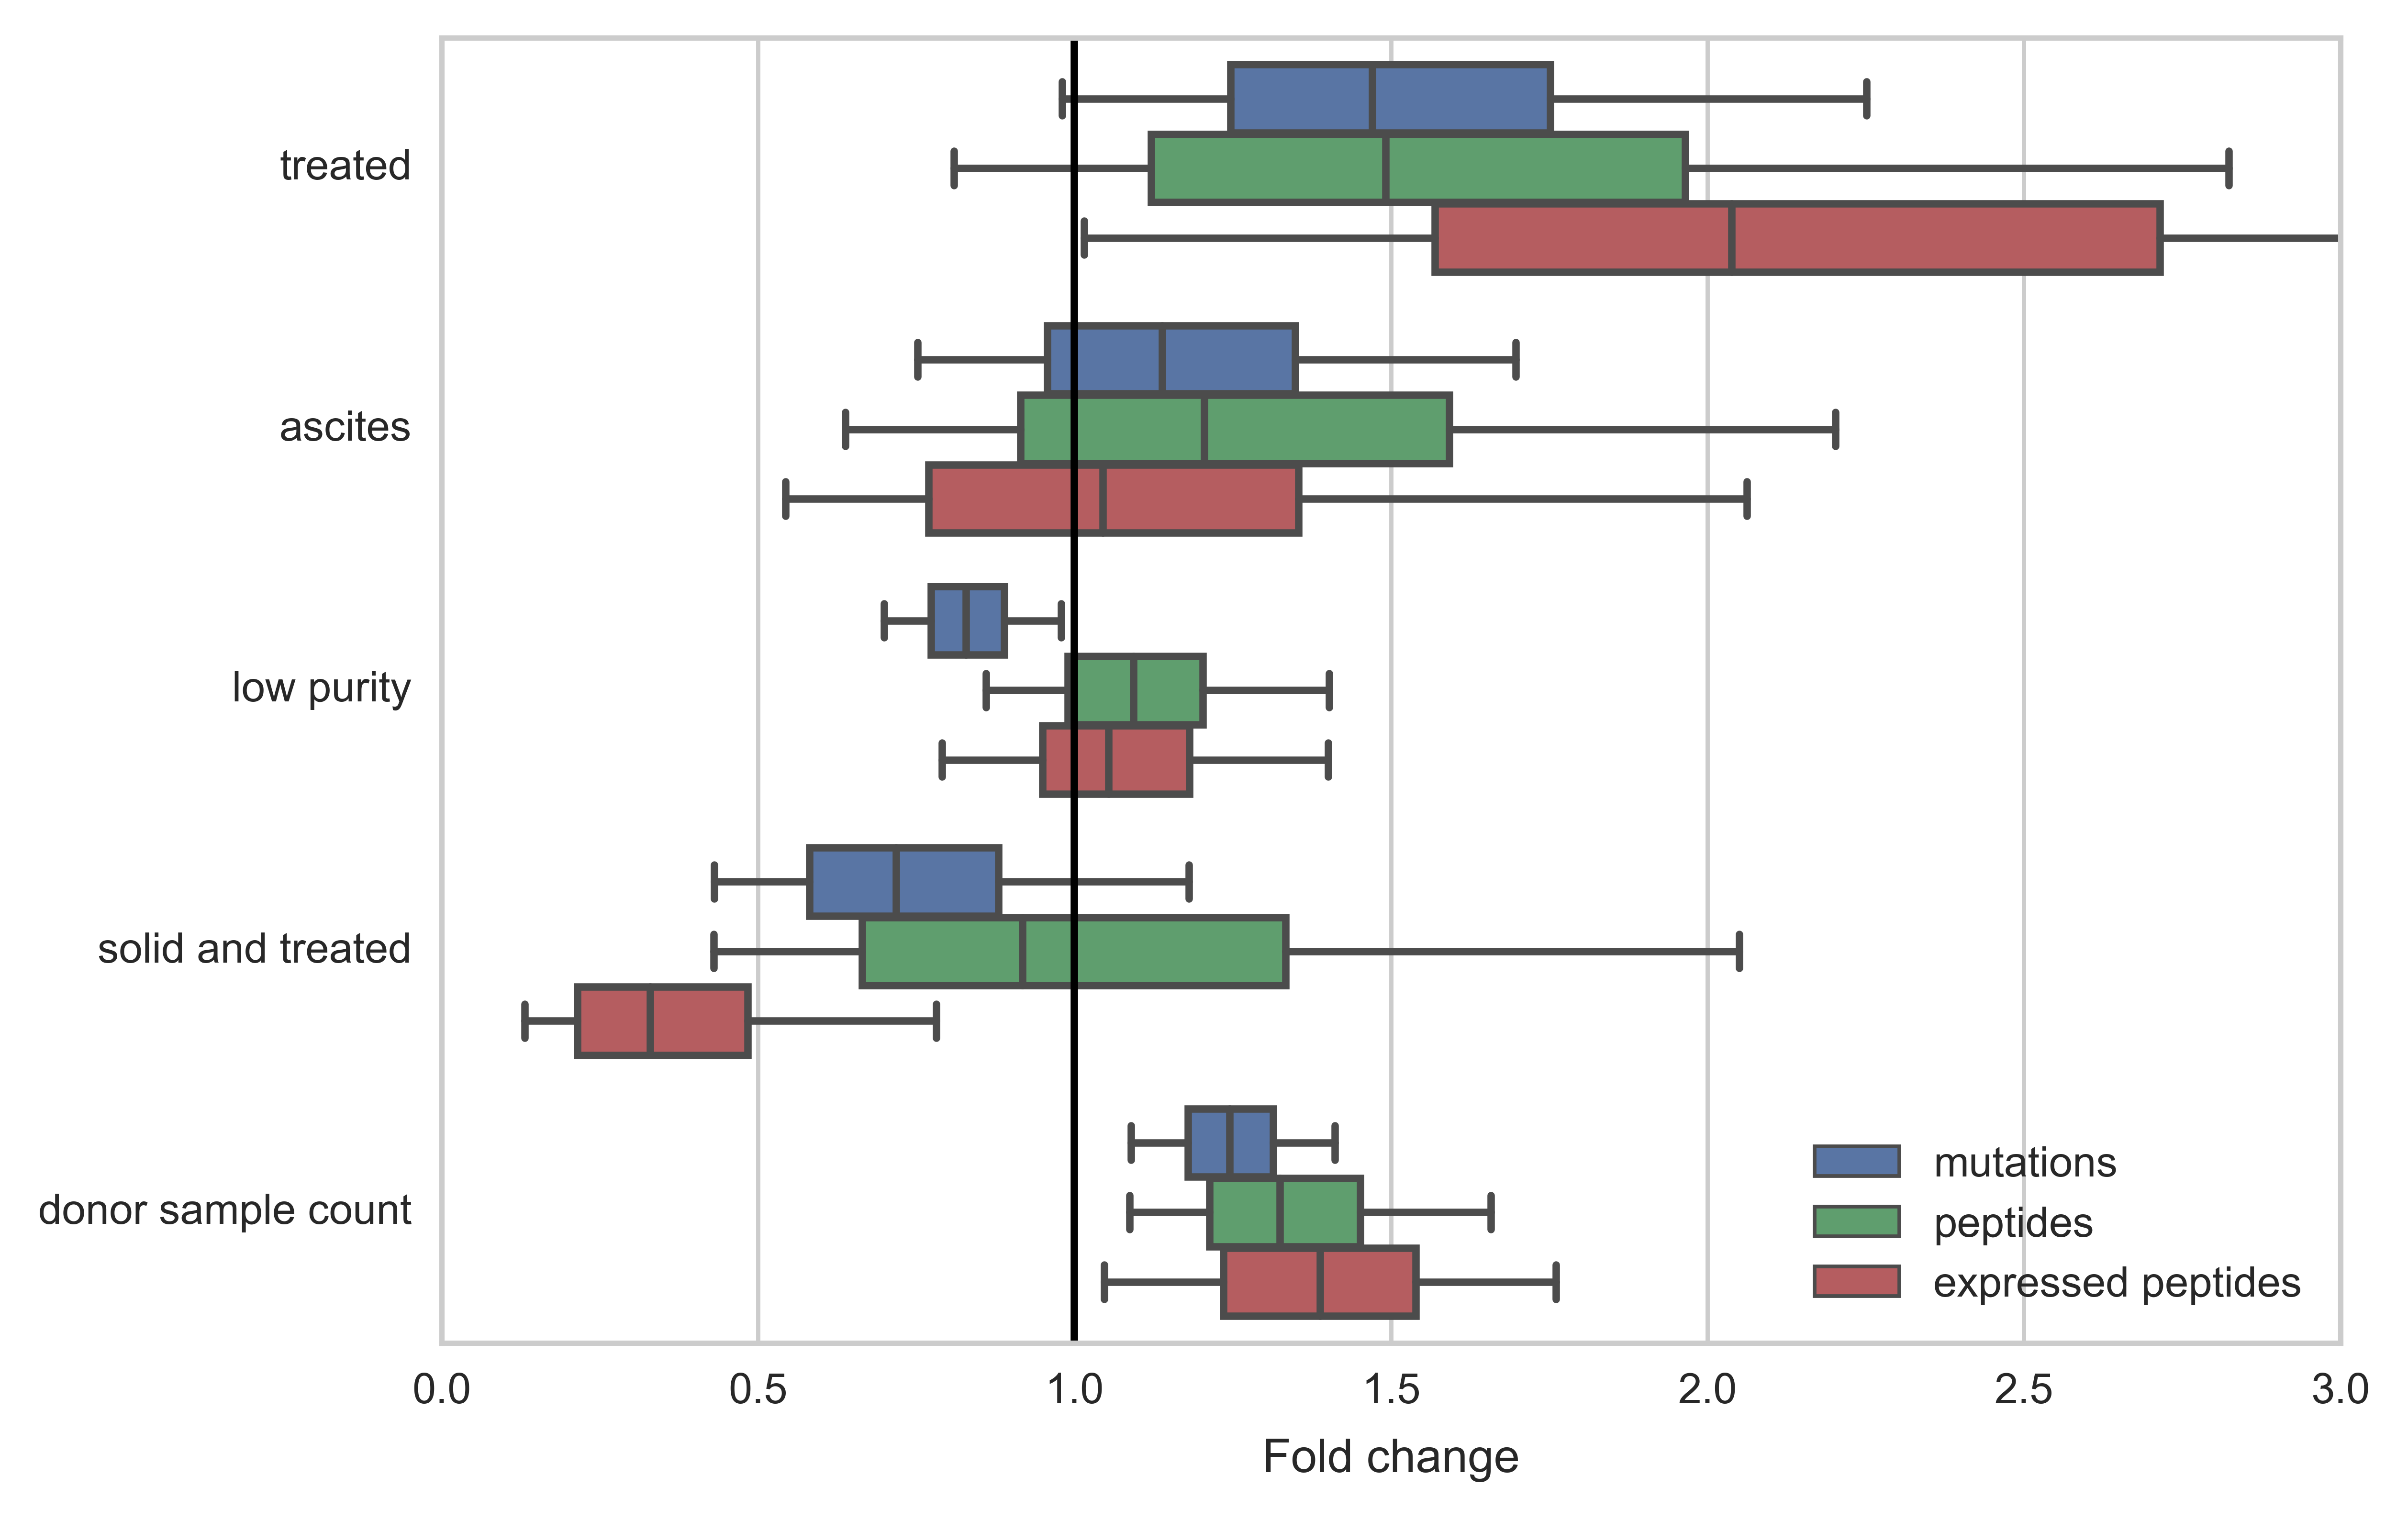

In [477]:
nice_melted = melted.copy()
nice_melted.variable = nice_melted.variable.map(lambda x: {
        "low_cellularity": "low purity",
        "num_sources_for_donor": "donor sample count"
}.get(x, x))

seaborn.set_context('paper')
seaborn.set_style("whitegrid")
seaborn.boxplot(
    data=nice_melted,
    y='variable',
    x='value',
    hue='y_label',
    order=["treated", "ascites", "low purity", "solid and treated", "donor sample count"],
    hue_order=["mutations", "peptides", "expressed peptides"],
    whis=[5, 95],
    orient='h',
    showbox=True,
    showfliers=False,
#    meanline=True,
#    showmeans=True
)
pyplot.xlim(xmin=0,xmax=3)
pyplot.ylabel("")
pyplot.xlabel("Fold change")
pyplot.legend(title=None, loc='lower right')
pyplot.axvline(1.0, color="black")
pyplot.savefig("../figures/bayesian_model_effects.pdf")

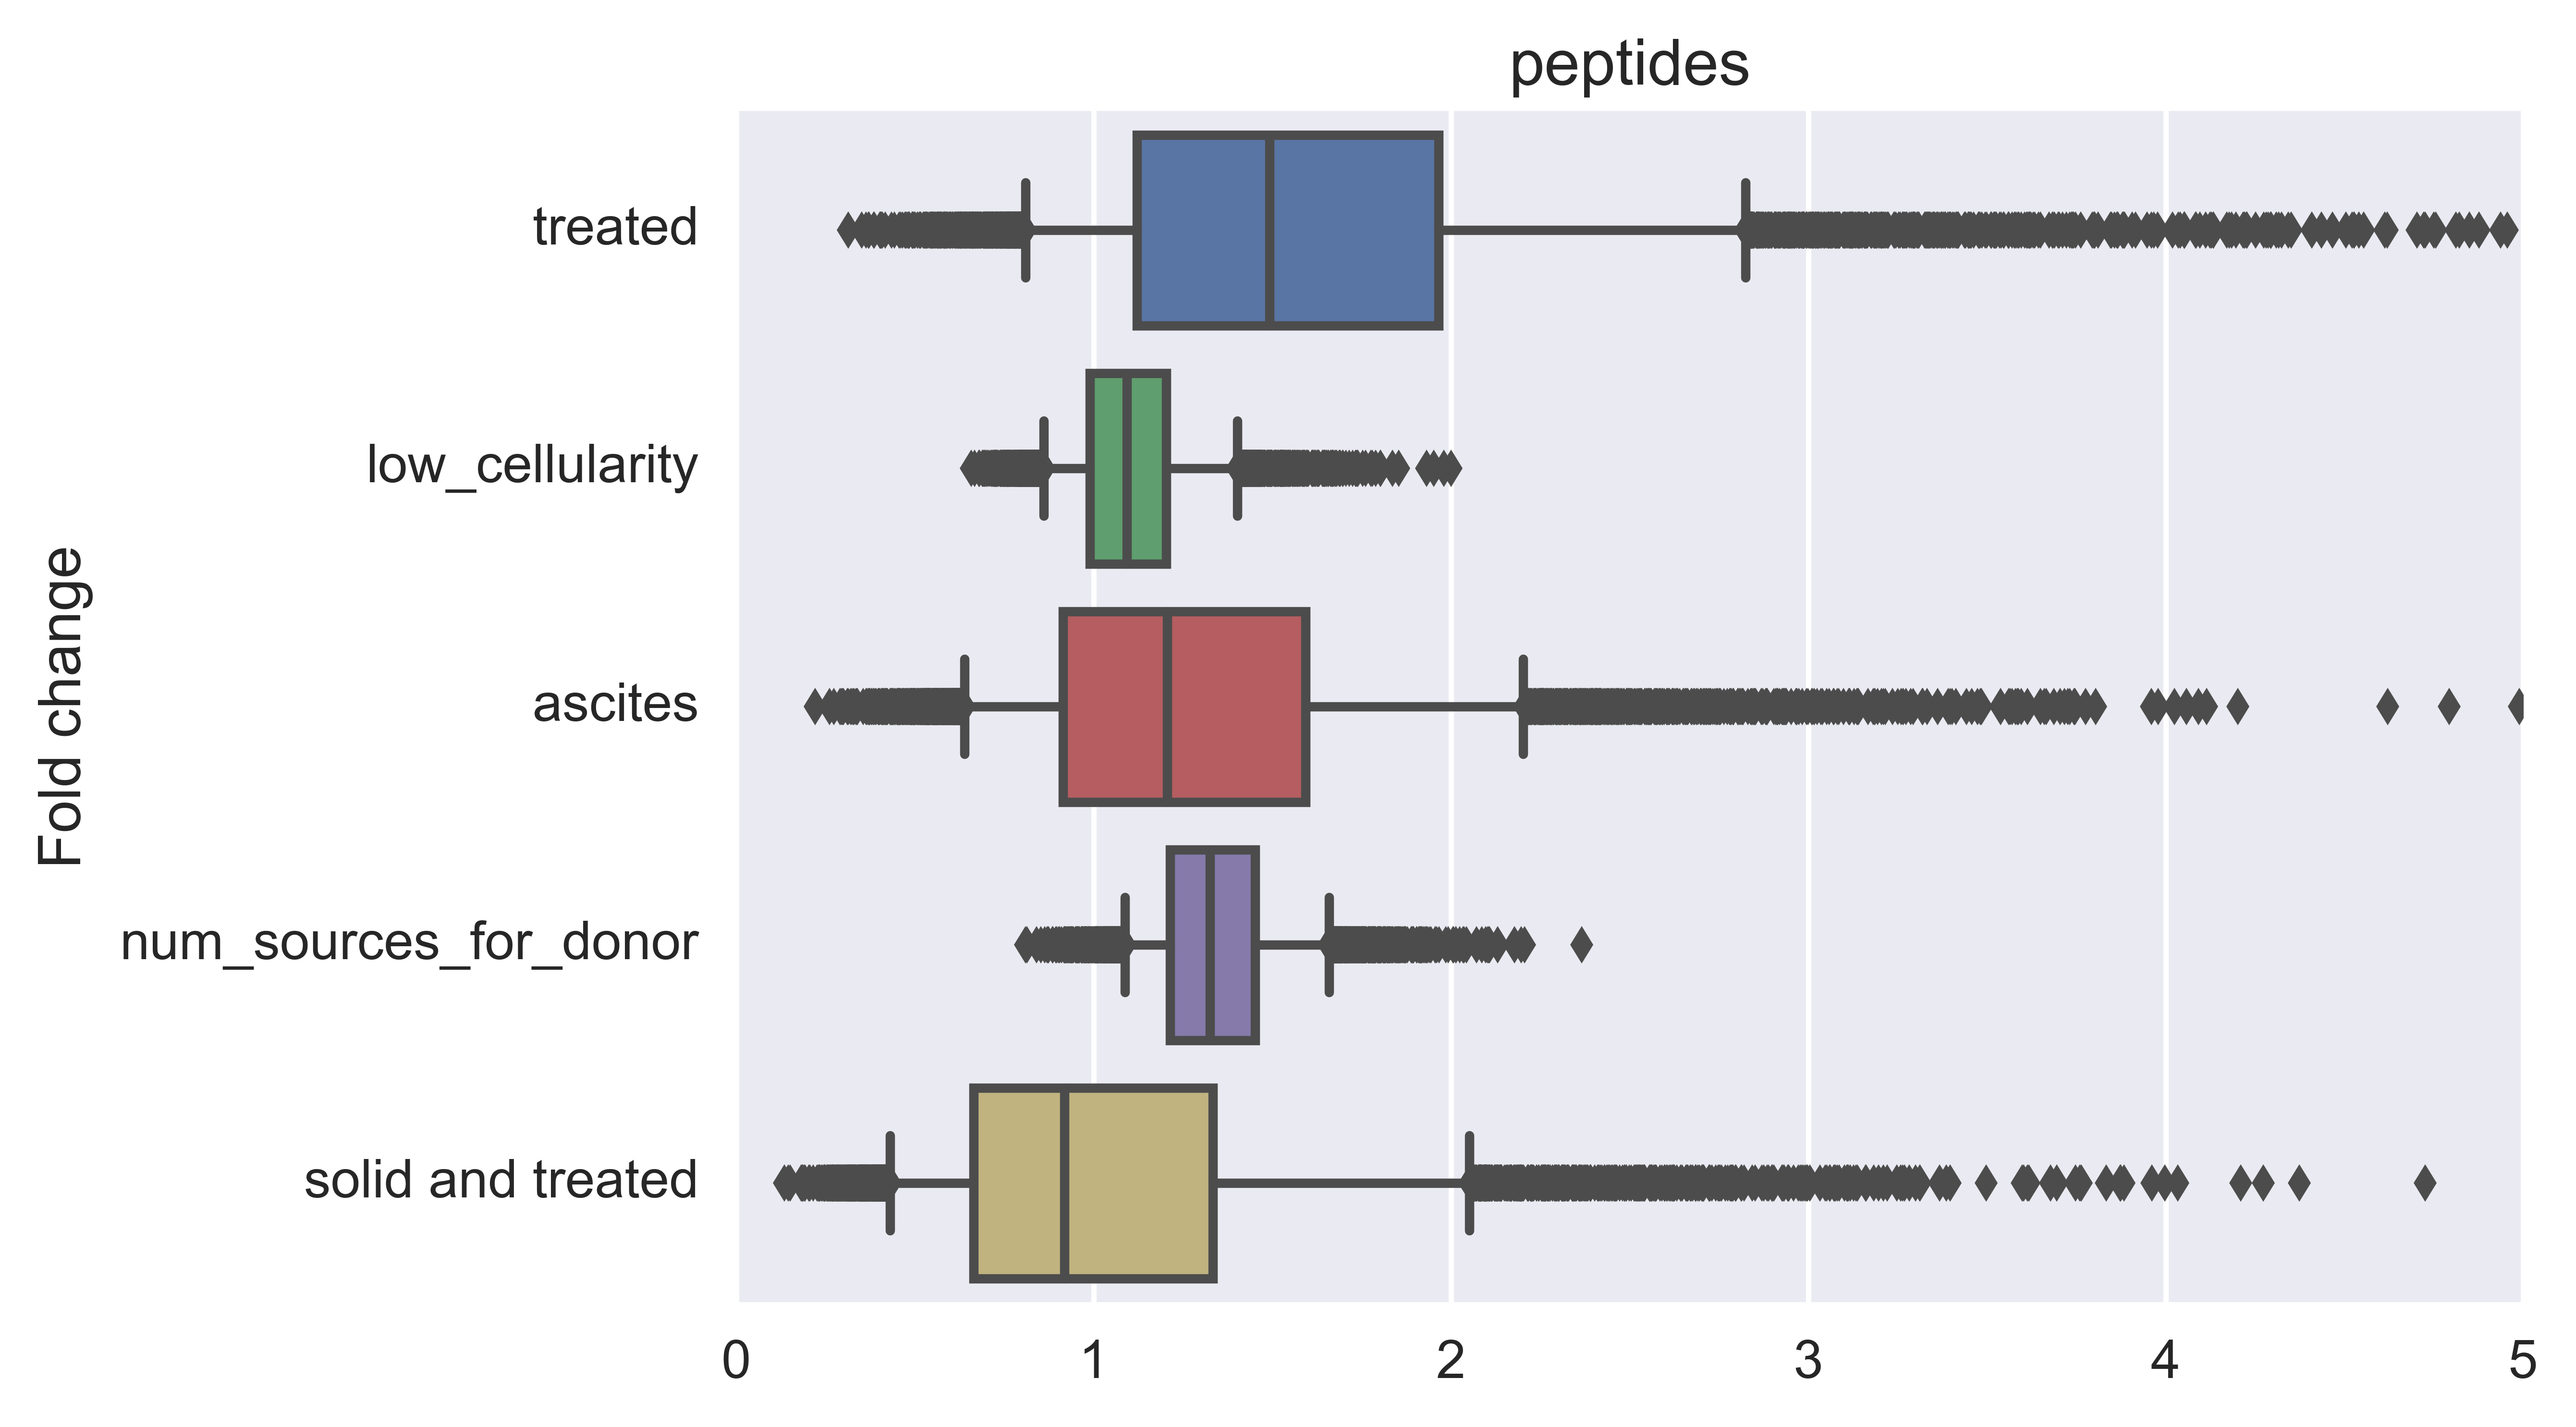

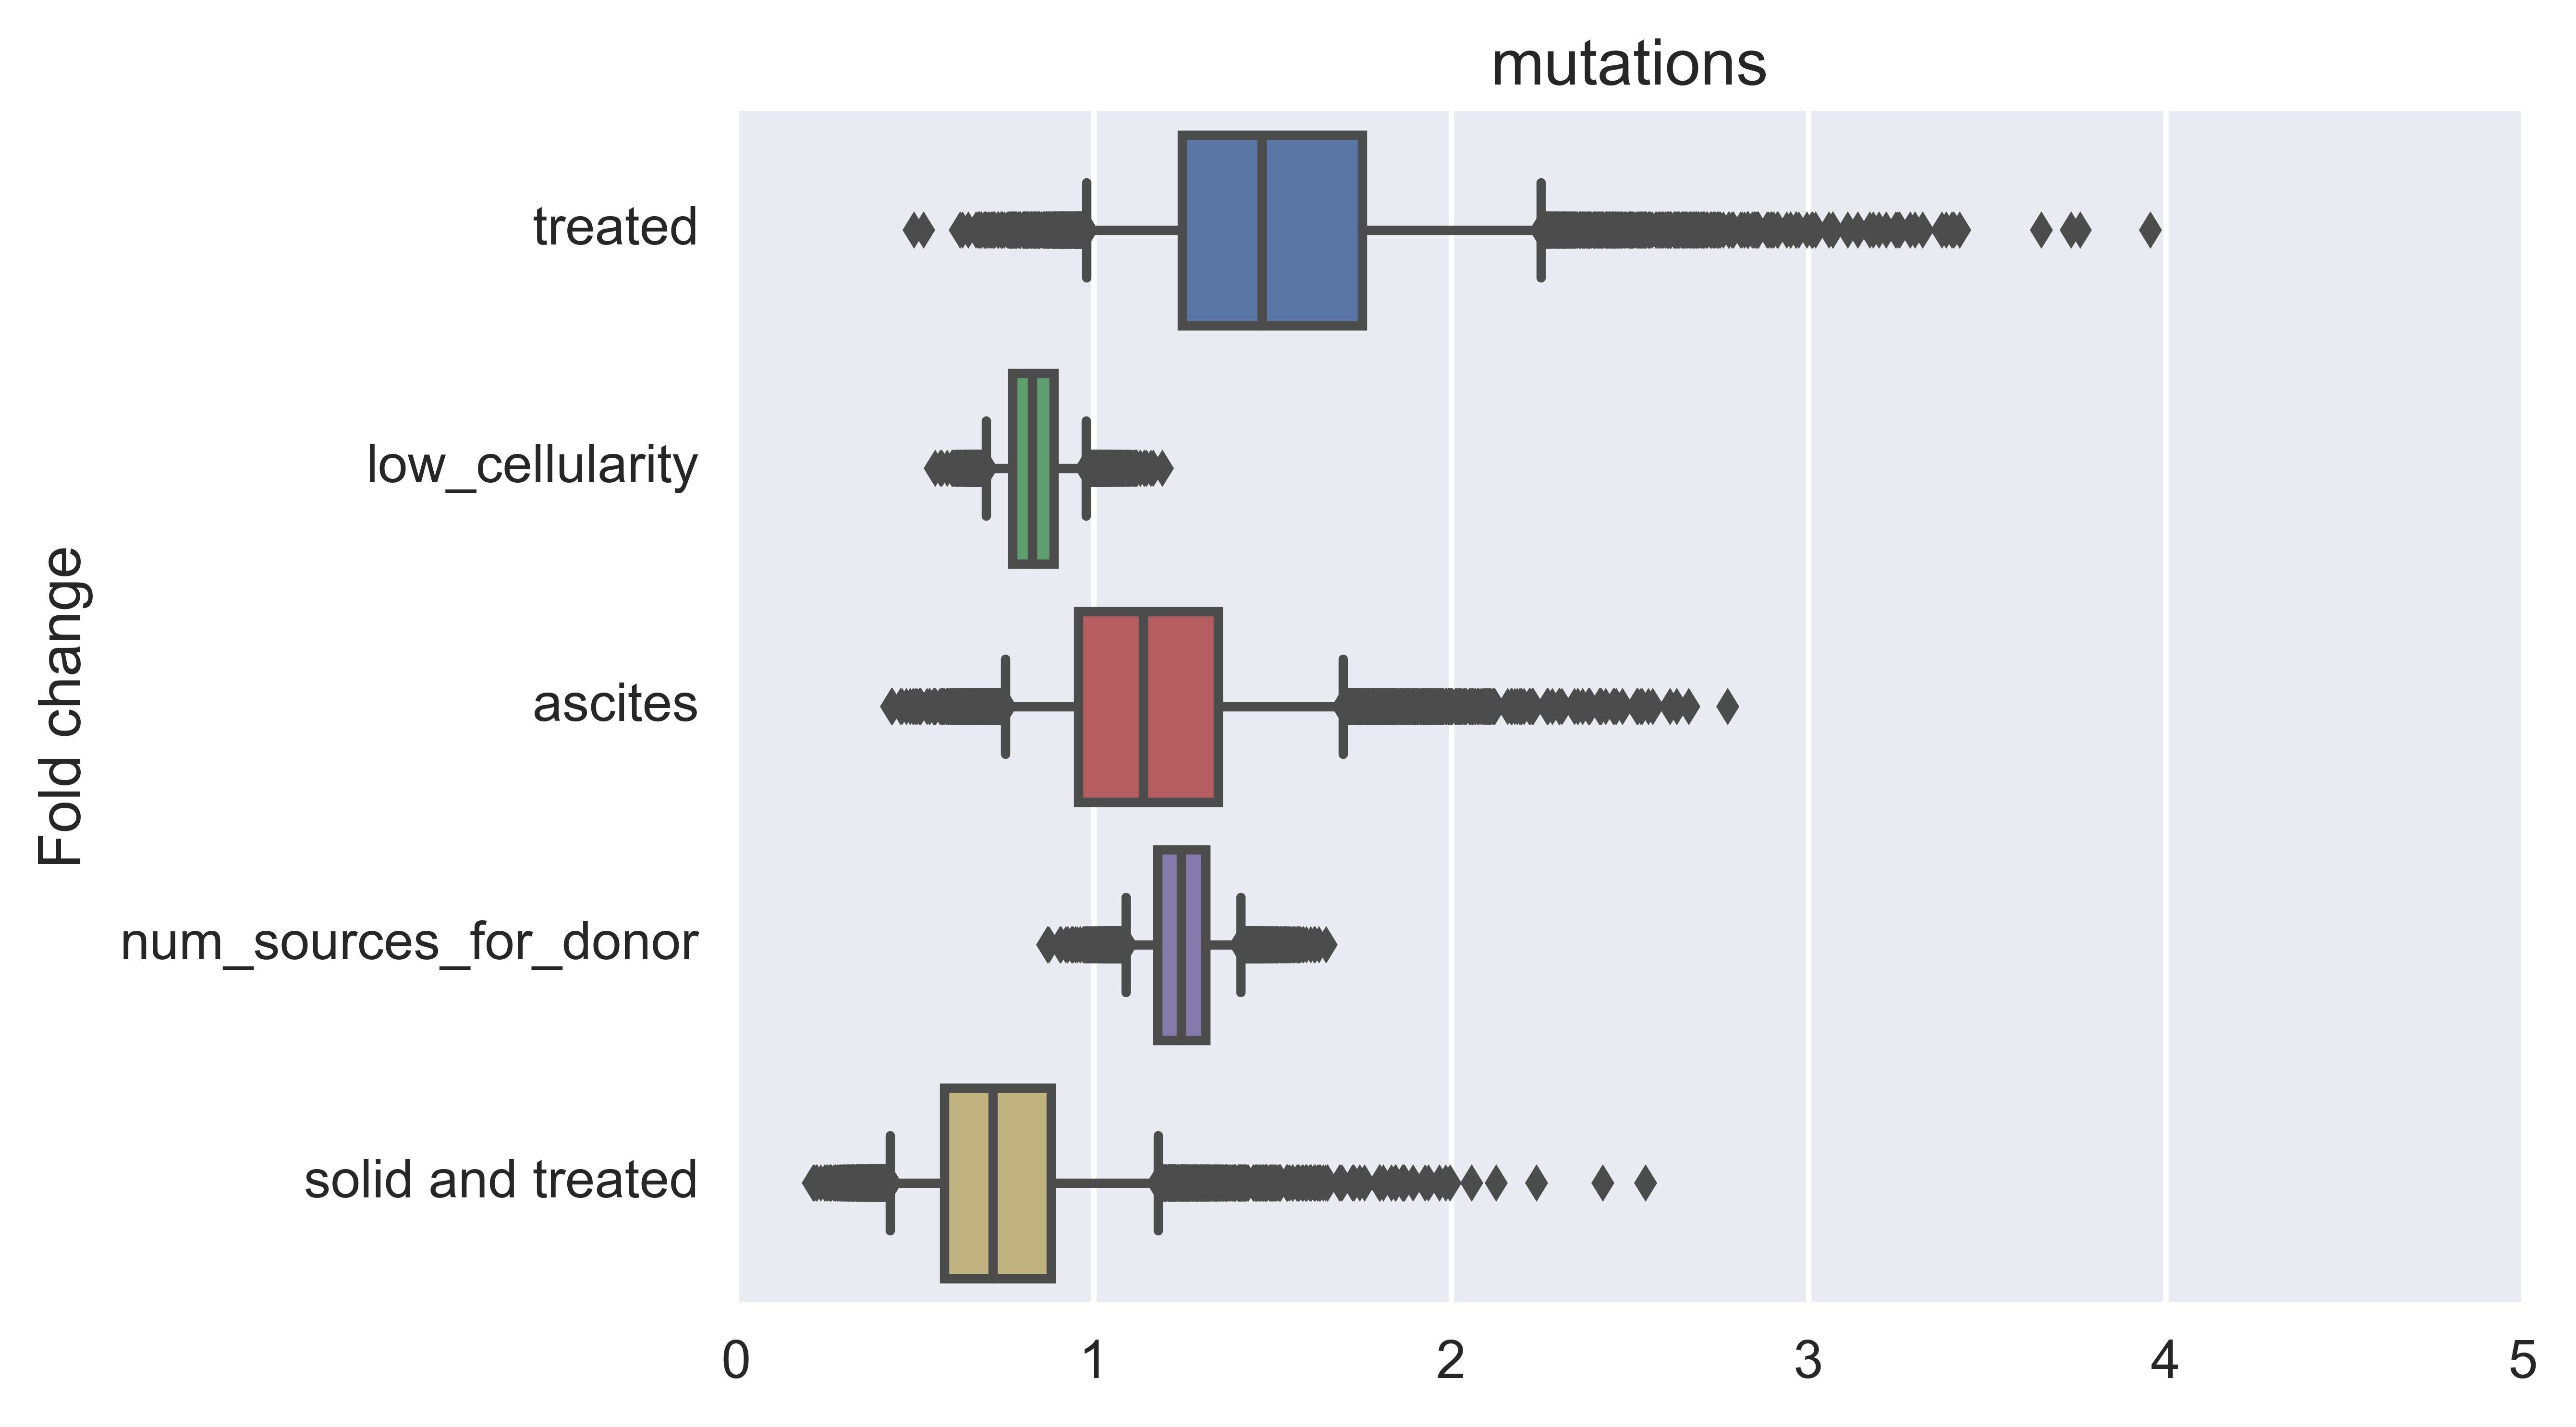

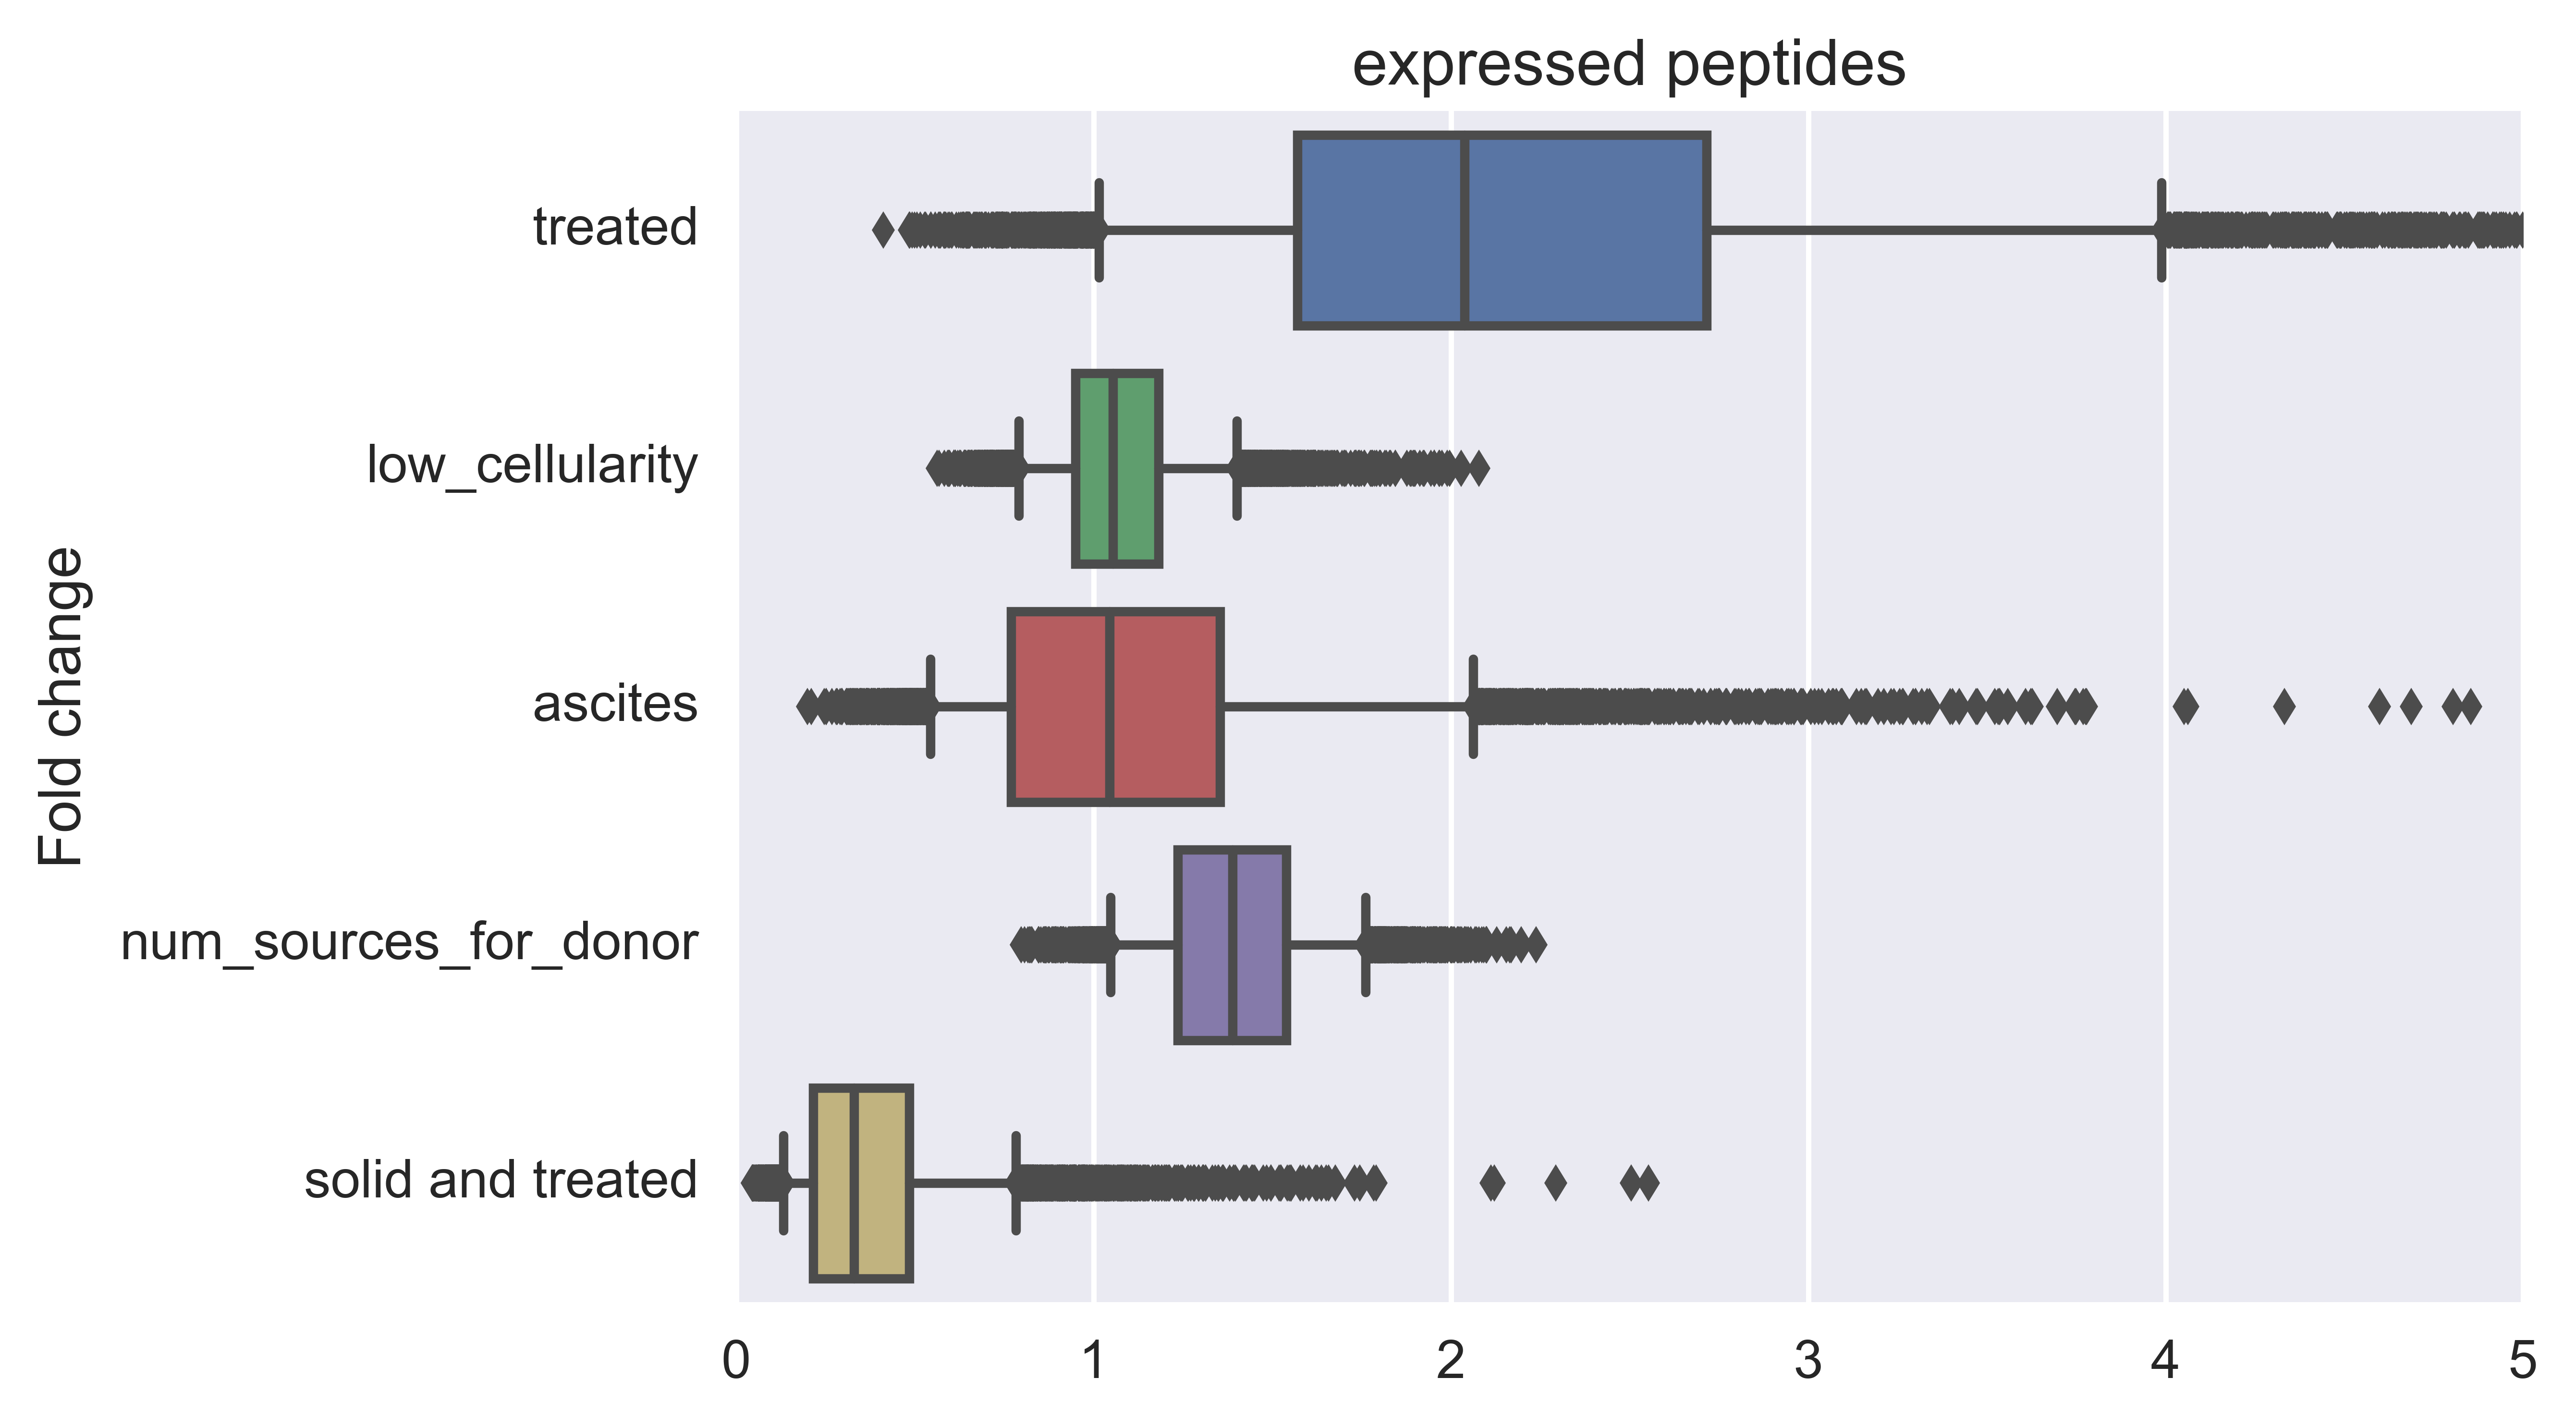

In [414]:
for y_label in fit_results:
    pyplot.figure()
    pyplot.title(y_label)
    seaborn.boxplot(
        data=all_fit_coefficients[all_fit_coefficients.y_label == y_label],
        orient="h",
        whis=[5, 95])

    pyplot.xlabel("Fold change")
    pyplot.xlim(xmin=0, xmax=5)


In [479]:
for y_label in fit_results:
    print(y_label)
    print(all_fit_coefficients[all_fit_coefficients.y_label == y_label].quantile(0.5))
    print("--")

    print(all_fit_coefficients[all_fit_coefficients.y_label == y_label].quantile(0.05))
    print(all_fit_coefficients[all_fit_coefficients.y_label == y_label].quantile(0.95))
    print("")

peptides
treated                  1.491681
low_cellularity          1.093730
ascites                  1.205616
num_sources_for_donor    1.325181
solid and treated        0.918192
dtype: float64
--
treated                  0.809571
low_cellularity          0.860956
ascites                  0.638152
num_sources_for_donor    1.087301
solid and treated        0.430442
dtype: float64
treated                  2.824007
low_cellularity          1.402896
ascites                  2.202594
num_sources_for_donor    1.658403
solid and treated        2.051004
dtype: float64

mutations
treated                  1.470534
low_cellularity          0.828706
ascites                  1.138522
num_sources_for_donor    1.245279
solid and treated        0.718507
dtype: float64
--
treated                  0.980556
low_cellularity          0.699351
ascites                  0.752519
num_sources_for_donor    1.090000
solid and treated        0.431007
dtype: float64
treated                  2.251923
low_cellularity

In [409]:
numpy.exp(extracted["donor_mean"]).mean()

32.627947411053711

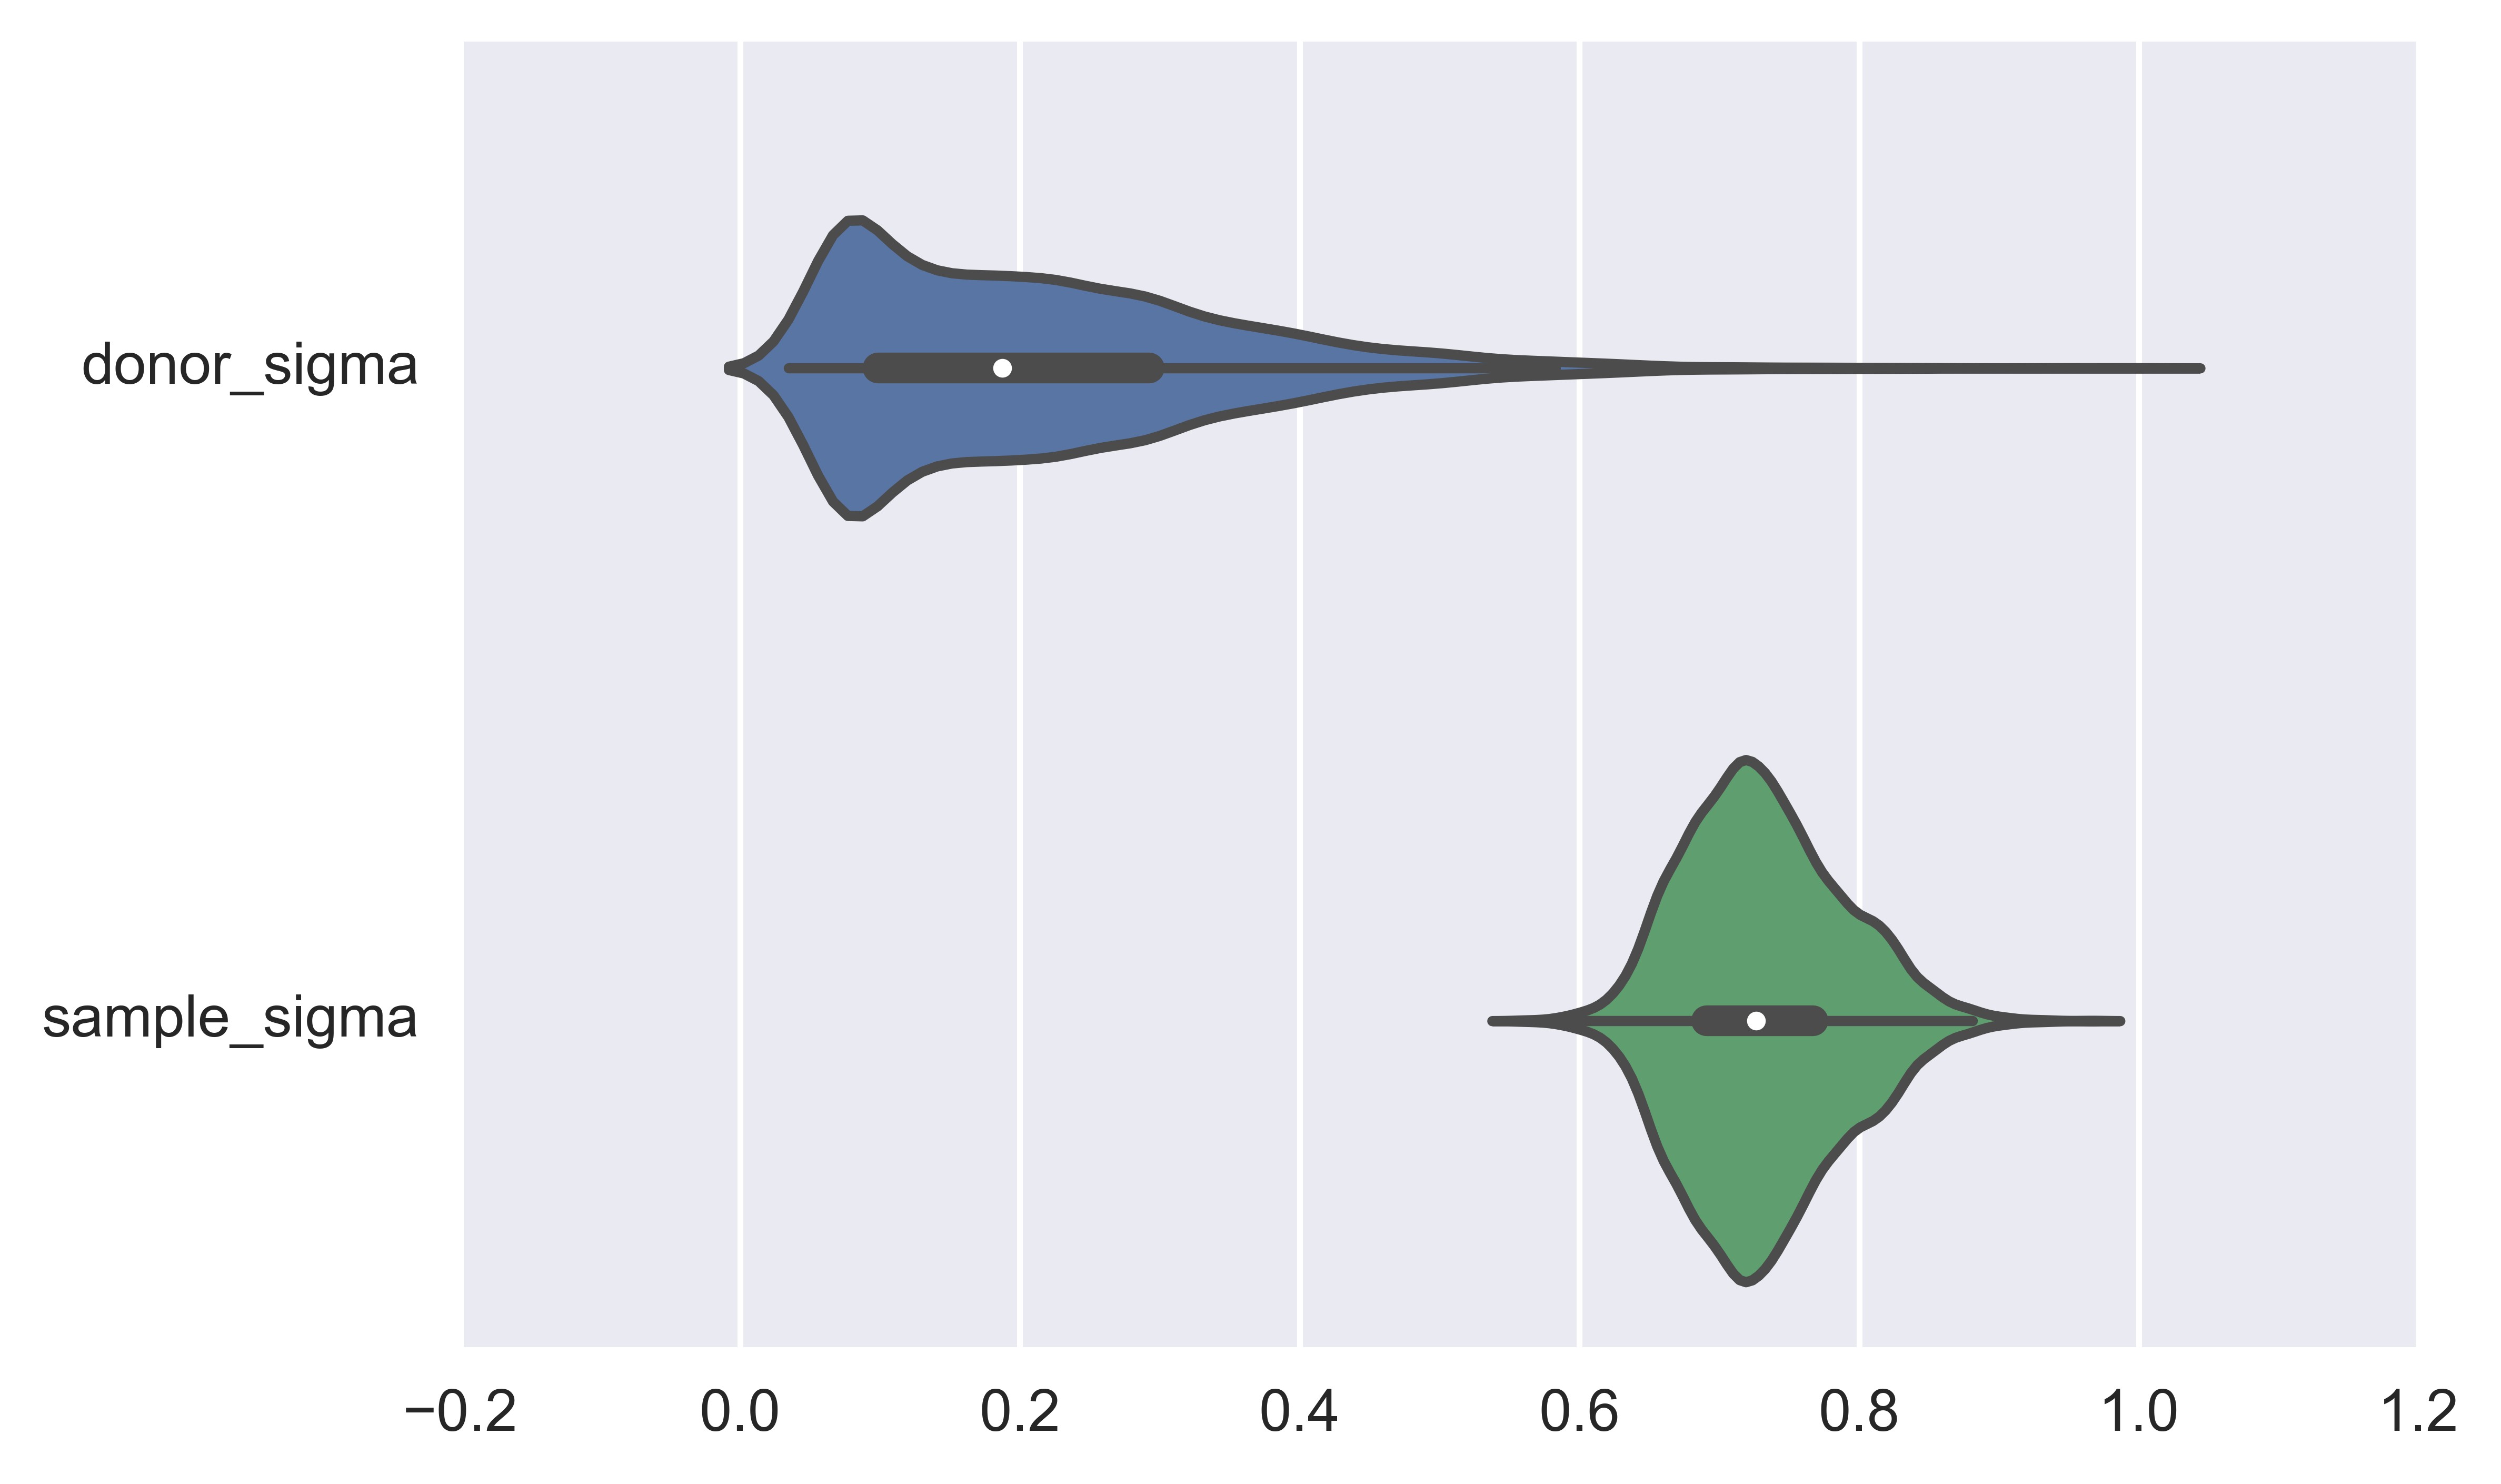

In [410]:
fit_scalars = pandas.DataFrame(
    dict((field, extracted[field])
         for field in ["donor_sigma", "sample_sigma"]))
seaborn.violinplot(fit_scalars, orient="h")

In [411]:
fit_donor_means = pandas.DataFrame(numpy.exp(extracted['donor_mean']),
                           columns=stan_donor.values.categories)
fit_donor_means.mean(0)

ValueError: Shape of passed values is (83, 10000), indices imply (93, 10000)